<a href="https://colab.research.google.com/github/Dikiwp30/Studi-Independen/blob/main/Diki_Wahyu_P_RB_%26_KM_3_1_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RB & KM 3-1 Neural Networks

# Membangun NN Sederhana

Kita akan membangun model Neural Networks (NN) sederhana yang hanya terdiri dari sebuah perceptron (single perpectron). Sesuai dengan dataset, model ini memiliki 3 buah input (x) dan 1 buah output (y).

<br>

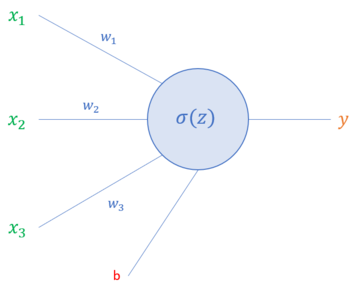

<br>

Kita akan menggunakan:
- initial weight random
- initial bias random
- alpha sebesar 0.05
- Sigmoid sebagai activation function
- MSE (*Mean Squared Error*) sebagai loss function
- Gradient Descent sebagai optimizer

## 1. Import Data

Hal yang pertama kali kita lakukan adalah meng-import dataset ke dalam program. Download dataset [di sini](https://drive.google.com/file/d/1VcdahaO80pntCii2dzfbc9_3xTLGPXLx/view?usp=sharing).

Cobalah analisis dataset yang sudah kita import! Berapa jumlah data, feature, dan label dalam dataset tersebut?

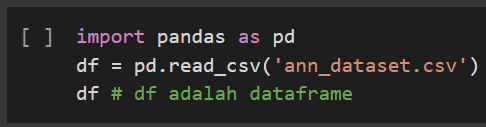

In [2]:
import pandas as pd
df = pd.read_csv('ann_dataset.csv')
df 

,Person,X1,X2,X3,Y
0,A,0,1,0,1
1,B,0,0,1,0
2,C,1,0,0,0
3,D,1,1,0,1
4,E,1,1,1,1
5,F,0,1,1,0
6,G,0,1,0,1


## 2. Preparing Data

Selanjutnya kita pisahkan feature (x) dari dataset.

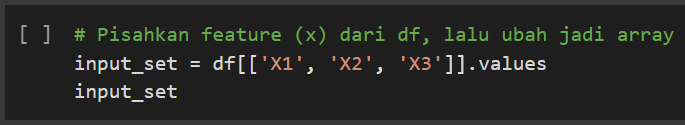

In [3]:
input_set = df[['X1', 'X2', 'X3']].values
input_set

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 0]])

Lalu, pisahkan label (t) dari dataset.

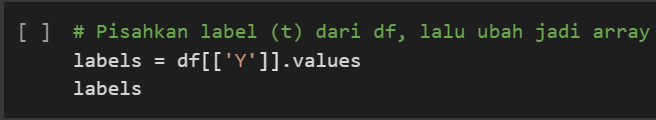

In [4]:
labels = df[['Y']].values
labels

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

## 3. Tentukan Hyperparameter

Kita perlu menginisisalisai nilai awal dari:
- Weight (Random)
- Bias (Random)
- Learning Rate = 0.05

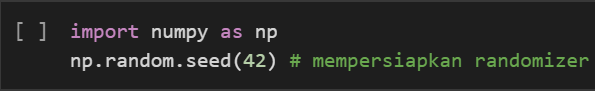

In [5]:
import numpy as np
np.random.seed(42)

Kita membutuhkan 3 weight karena terdapat 3 input.

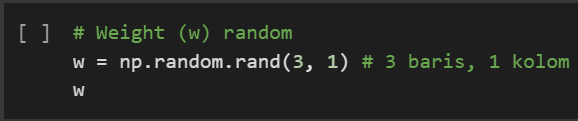

In [32]:
w = np.random.rand(3, 1)
w

array([[0.15601864],
       [0.15599452],
       [0.05808361]])

Kita hanya membutuhkan 1 bias pada sebuah layer NN.

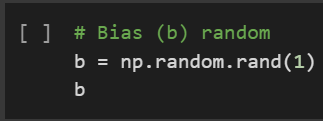

In [33]:
b = np.random.rand(1)
b

array([0.86617615])

Tetapkan learning rate (*alpha*) sebesar 0.05.

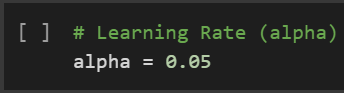

In [34]:
alpha = 0.05

## 4. Sigmoid Activation Function

Persiapkan activation function **sigmoid**. Berikut ini adalah persamaannya:

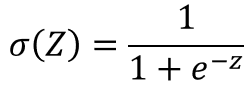

**Note:** e disebut sebagai natural exponential.

Ubah persamaan di atas ke dalam bentuk program:

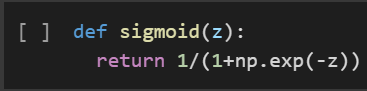


In [35]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

### Turunan sigmoid terhadap z

Siapkan turunan sigmoid terhadap z (turunan y terhadap z) untuk proses Backpropagation. Berikut adalah persamaannya:

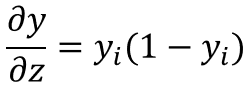

Ubah persamaan di atas ke dalam bentuk program:

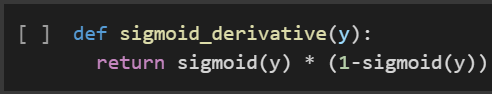


In [36]:
def sigmoid_derivative(y):
  return sigmoid(y) * (1-sigmoid(y))

## 5. Forward Pass


Forward Pass adalah tahapan di mana kita memberikan input ke dalam model NN.
- Input akan diterima melalui input layer.
- Input lalu diproses oleh hidden layer.
- Hasil proses (output/prediksi) kemudian dikeluarkan melalui output layer.
- Selanjutnya mengkalkulasi loss berdasarkan 𝑡 dan 𝑦 menggunakan loss function.

### A. Input Data

Data yang diinput ke dalam model NN akan dikalkulasi menggunakan persamaan berikut:

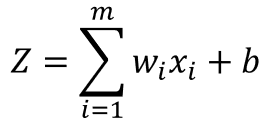

Setiap input (x) akan dikalikan dengan weight (w) kemudian dijumlahkan dengan bias (b).

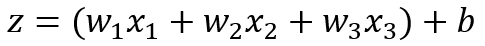

Hasil kalkulasi input disebut sebagai z.

Berikut adalah implementasi dari persamaan di atas untuk mendapatkan z:

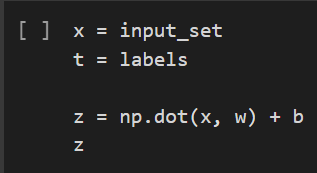

**Note:** t adalah label atau target. t diperlukan untuk menghitung loss.

In [37]:
x = input_set
t = labels
z = np.dot(x, w)  + b
z

array([[1.02217067],
       [0.92425976],
       [1.02219479],
       [1.17818931],
       [1.23627292],
       [1.08025428],
       [1.02217067]])

### B. Prediksi

Memproduksi output atau hasil prediksi model berdasarkan feature.

Output berasal dari z yang di-passing ke dalam activation function sigmoid.

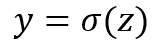

Untuk memproduksi output, kita tinggal memanggil function `sigmoid()` yang telah kita buat sebelumnya. Lalu, passing argument `z`.

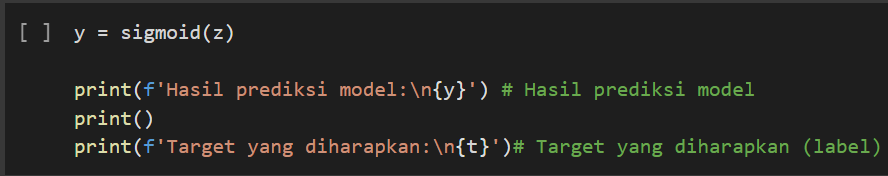

In [38]:
y = sigmoid(z)

print(f'Hasil prediksi model:\n{y}')
print()
print(f'Target yang diharapkan:\n{t}')

Hasil prediksi model:
[[0.7353952 ]
 [0.71590927]
 [0.7353999 ]
 [0.76462208]
 [0.7749146 ]
 [0.7465421 ]
 [0.7353952 ]]

Target yang diharapkan:
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


### C. Loss Function: Mean Squared Error (MSE)

Hitung loss (E) menggunakan loss function MSE.

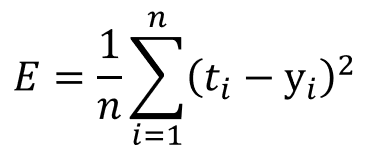

Program untuk menghitung loss:

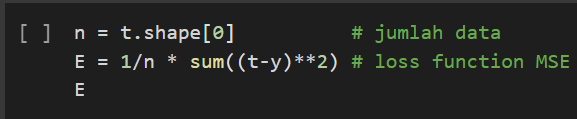

In [39]:
n = t.shape[0]
E = 1/n * sum((t-y)**2)
E

array([0.26525168])

## 6. Backward Pass

Update weight dan bias menggunakan optimizer *Gradient Descent*.

### A. Update Weight (w)

Persamaan Gradient Descent untuk meng-update weight.

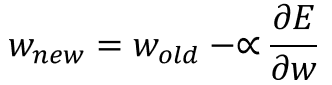

Mencari turunan loss function (E) terhadap weight (w) menggunakan Chain Rule:

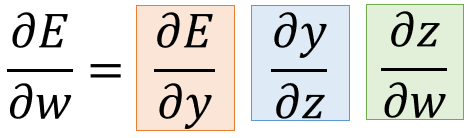

- Turunan E terhadap y:

  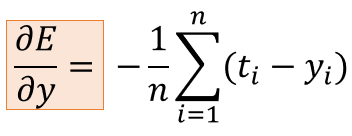

Bentuk program turunan E terhadap y:
  
  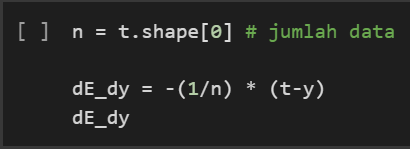

In [40]:
n = t.shape[0]

dE_dy = -(1/n) * (t-y)
dE_dy

array([[-0.03780069],
       [ 0.10227275],
       [ 0.10505713],
       [-0.03362542],
       [-0.03215506],
       [ 0.10664887],
       [-0.03780069]])

- Turunan y terhadap z:

  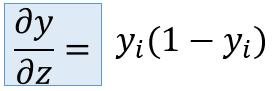

Bentuk program turunan y terhadap z:

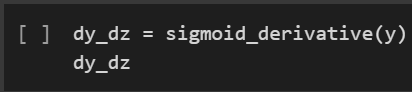

In [41]:
dy_dz = sigmoid_derivative(y)
dy_dz

array([[0.21902819],
       [0.2205172 ],
       [0.21902783],
       [0.21674615],
       [0.21592909],
       [0.2181646 ],
       [0.21902819]])

- Turunan z terhadap w:

  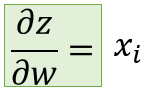

Bentuk program turunan z terhadap w:

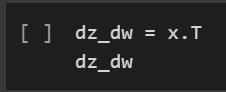

In [42]:
dz_dw = x.T
dz_dw

array([[0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 0]])

Akhirnya didapatkan turunan E terhadap w sebagai berikut:

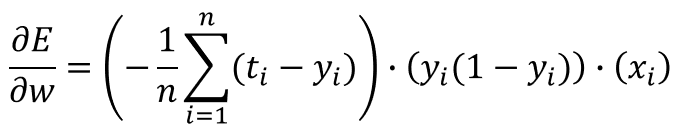

Program turunan E terhadap w:

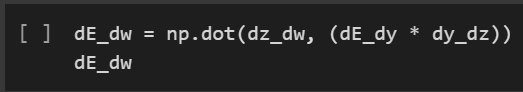

In [43]:
dE_dw = np.dot(dz_dw, (dE_dy * dy_dz))
dE_dw

array([[ 0.00877904],
       [-0.00752322],
       [ 0.0388767 ]])

Update weight menggunakan Gradient Descent

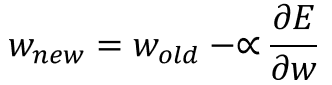

Program update weight menggunakan Gradient Descent:

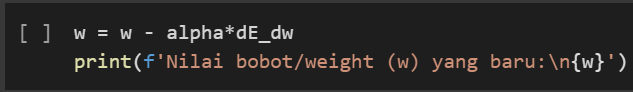

In [44]:
w = w - alpha*dE_dw
print(f'Nilai bobot/weight (w) yang baru:\n{w}')

Nilai bobot/weight (w) yang baru:
[[0.15557969]
 [0.15637068]
 [0.05613978]]


### B. Update Bias (b)

Persamaan Gradient Descent untuk meng-update weight.

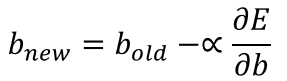

Mencari turunan loss function (E) terhadap b menggunakan Chain Rule.

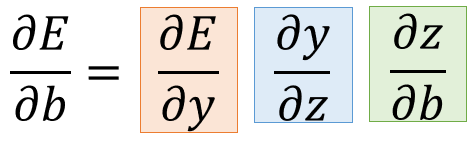

- Turunan E terhadap y:

  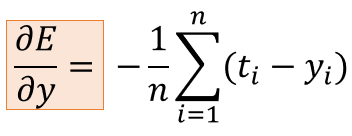

  **Note:** turunan E terhadap y sudah dicari pada proses sebelumnya.

- Turunan y terhadap z:

  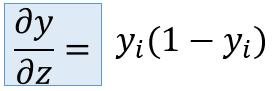

  **Note:** turunan y terhadap z sudah dicari pada proses sebelumnya.

- Turunan z terhadap b:

  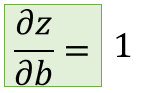

Bentuk program turunan z terhadap b:

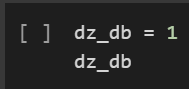

In [45]:
dz_db = 1
dz_db

1

Akhirnya didapatkan turunan E terhadap b sebagai berikut:


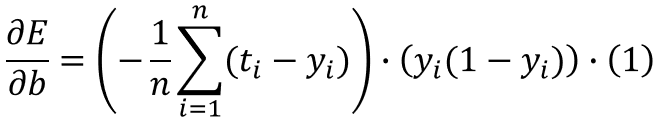


Program turunan E terhadap b:

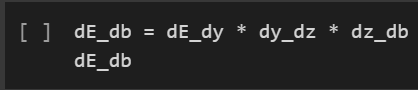

In [46]:
dE_db = dE_dy * dy_dz * dz_db
dE_db

array([[-0.00827942],
       [ 0.0225529 ],
       [ 0.02301043],
       [-0.00728818],
       [-0.00694321],
       [ 0.02326701],
       [-0.00827942]])

Update bias menggunakan Gradient Descent

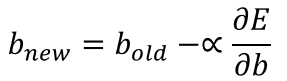

Program update bias menggunakan Gradient Descent:

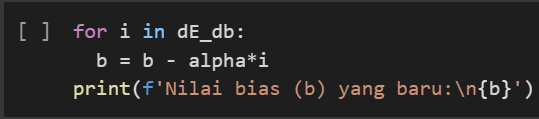

In [48]:
for i in dE_db:
  b = b - alpha*i
print(f'Nilai bias (b) yang baru:\n{b}')

Nilai bias (b) yang baru:
[0.86237213]


Proses Forward Pass dan Backward Pass (Backpropagation) akan dilakukan secara terus menerus sampai:
- y = t atau y mendekati t,
- E = 0 atau E mendekati nol, atau
- jumlah epoch telah tercapai.

## Mengkombinasikan semua program NN

Selanjutnya kita akan merapikan seluruh program yang sudah kita ketik sebelumnya menjadi satu kesatuan.

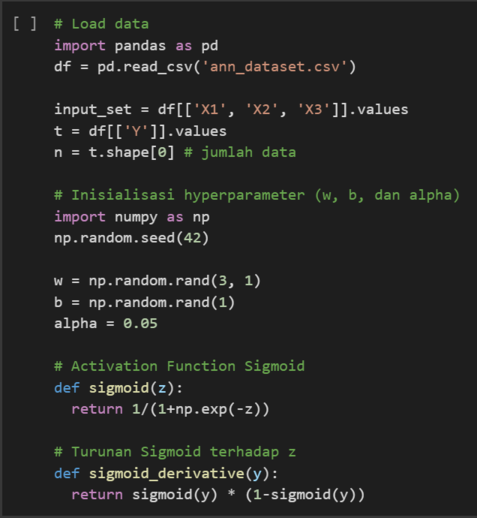

In [56]:
# load data
import pandas as pd
df = pd.read_csv('ann_dataset.csv')

input_set = df[['X1', 'X2', 'X3']].values
t = df[['Y']].values
n = t.shape[0]

# inisialisasi hyperparameter (w, b, dan alpha)
import numpy as np
np.random.seed(42)

w = np.random.rand(3, 1)
b = np.random.rand(1)
alpha = 0.05

# activation function sigmoid
def sigmoid(z):
  return 1/(1+np.exp(-z))

# turunan sigmoid terhadap z
def sigmoid_derivative(y):
  return sigmoid(y) * (1-sigmoid(y))

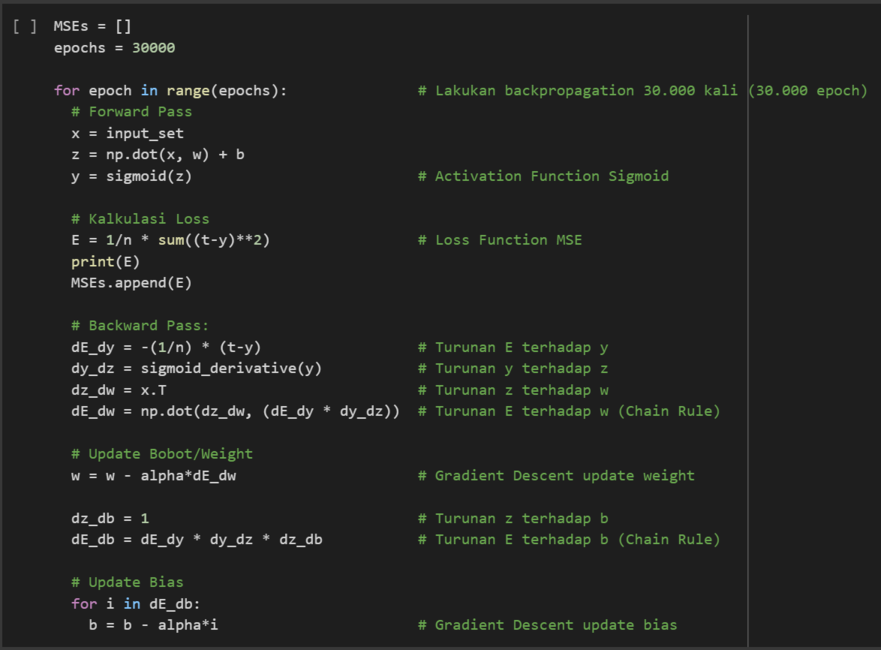

In [57]:
MSEs = []
epochs = 30000

for epoch in range(epochs):
  # forward pass
  x = input_set
  z = np.dot(x, w) + b
  y = sigmoid (z)

  # kalkulasi loss
  E = 1/n * sum((t-y)**2)
  print(E)
  MSEs.append(E)

  # backward pass
  dE_dy = -(1/n) * (t-y)
  dy_dz = sigmoid_derivative(y)
  dz_dw = x.T
  dE_dw = np.dot(dz_dw, (dE_dy * dy_dz))

  # update bobot/weight
  w = w - alpha*dE_dw

  dz_db = 1
  dE_db = dE_dy * dy_dz * dz_db

  # update bias
  for i in dE_db:
    b = b - alpha*i

Output streaming akan dipotong hingga 5000 baris terakhir.
[0.01469746]
[0.01469664]
[0.01469583]
[0.01469502]
[0.01469421]
[0.0146934]
[0.01469258]
[0.01469177]
[0.01469096]
[0.01469015]
[0.01468934]
[0.01468853]
[0.01468771]
[0.0146869]
[0.01468609]
[0.01468528]
[0.01468447]
[0.01468366]
[0.01468285]
[0.01468204]
[0.01468122]
[0.01468041]
[0.0146796]
[0.01467879]
[0.01467798]
[0.01467717]
[0.01467636]
[0.01467555]
[0.01467474]
[0.01467393]
[0.01467312]
[0.01467231]
[0.0146715]
[0.01467069]
[0.01466988]
[0.01466907]
[0.01466826]
[0.01466745]
[0.01466664]
[0.01466583]
[0.01466502]
[0.01466421]
[0.0146634]
[0.01466259]
[0.01466178]
[0.01466097]
[0.01466016]
[0.01465935]
[0.01465854]
[0.01465773]
[0.01465692]
[0.01465612]
[0.01465531]
[0.0146545]
[0.01465369]
[0.01465288]
[0.01465207]
[0.01465126]
[0.01465045]
[0.01464965]
[0.01464884]
[0.01464803]
[0.01464722]
[0.01464641]
[0.0146456]
[0.0146448]
[0.01464399]
[0.01464318]
[0.01464237]
[0.01464156]
[0.01464076]
[0.01463995]
[0.01463914]


Cetak weight dan bias pada epoch terakhir.

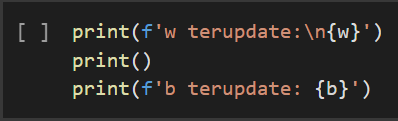

In [58]:
print(f'w terupdate:n\{w}')
print()
print(f'b terupdate: {b}')

w terupdate:n\[[ 3.12778817]
 [ 7.99305715]
 [-4.34986749]]

b terupdate: [-5.18648572]


## 7. Evaluation

Kita juga dapat memvisualisasikan loss model NN pada tiap epoch.

Coba jalankan program di bawah ini lalu buat kesimpulan dari hasil visualisasinya!


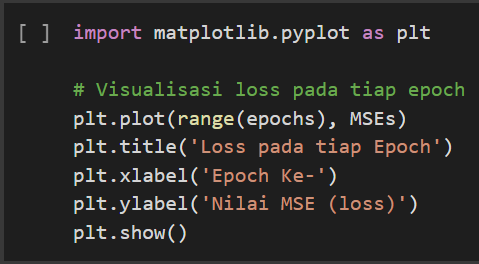

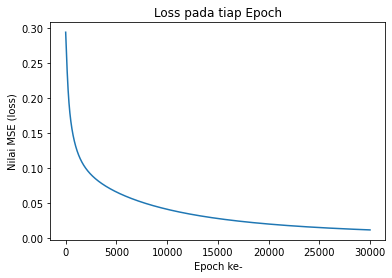

In [59]:
from pandas._libs.algos import ensure_platform_int
import matplotlib.pyplot as plt

plt.plot(range(epochs), MSEs)
plt.title('Loss pada tiap Epoch')
plt.xlabel('Epoch ke-')
plt.ylabel('Nilai MSE (loss)')
plt.show()

## 8. Prediction

Model NN yang telah kita kembangkan dapat kita gunakan untuk memprediksi data baru. Kita akan coba untuk memprediksi kelas/label dua data baru berikut ini:

Person | X1 | X2 | X3
-|-|-|-
H|0|0|0
I|1|0|1

Memprediksi person H:

Tentukan kelas person H berdasarkan hasil prediksi model NN!

**Clue:** lihat sigmoid function

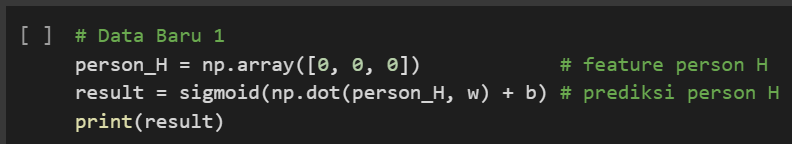

In [60]:
person_H = np.array([0, 0, 0])
result = sigmoid(np.dot(person_H, w) + b)
print(result)

[0.00556053]


Memprediksi person I:

Tentukan kelas person I berdasarkan hasil prediksi model NN!

**Clue:** lihat sigmoid function

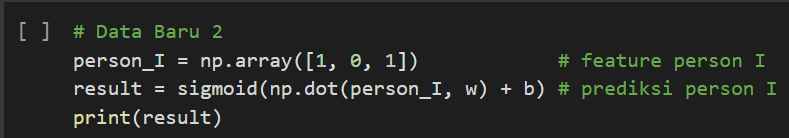

In [61]:
person_I = np.array([1, 0, 1])
result = sigmoid(np.dot(person_I, w) + b)
print(result)

[0.00164468]
